In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
in_dir = '../../results/06_endo/01_clustering'
out_dir = '../../results/06_endo/04_merge_clusters'

os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad(f'{in_dir}/endothelial.h5ad')

In [4]:
adata.obs

,patient_id,condition,cell_type,data,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,leiden,sub_clusters
1757,pt03031,SSc,Endothelial,Gur2022,1399,7.244228,2129.709717,7.664210,8.808879,15.756856,26.209239,49.364402,42.825531,2.010862,2,Endo3
1759,pt03031,SSc,Endothelial,Gur2022,921,6.826545,1882.764404,7.541028,9.823344,17.731814,30.847338,60.538348,41.865585,2.223623,1,Endo2
1760,pt03031,SSc,Endothelial,Gur2022,1333,7.195937,2253.614014,7.720734,8.132626,14.578190,25.167330,48.547388,44.364902,1.968611,1,Endo2
1761,pt03031,SSc,Endothelial,Gur2022,367,5.908083,1074.742188,6.980766,18.205389,32.811341,57.975576,99.999761,52.617405,4.895816,4,Endo5
1776,pt03031,SSc,Endothelial,Gur2022,758,6.632002,1719.642944,7.450453,11.049687,19.943196,35.221044,70.149312,42.533260,2.473377,2,Endo3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGGCATGTAAGA-1_21,GSM4115889,SSc,Endothelial,Tabib2021,829,6.721426,1903.178711,7.551806,10.647275,19.110869,33.266860,65.386158,25.427444,1.336051,2,Endo3
TTGTAGGTCGAATCCA-1_21,GSM4115889,SSc,Endothelial,Tabib2021,2952,7.990577,2841.908936,7.952583,7.089535,12.926824,22.117747,39.326444,32.655499,1.149069,2,Endo3
TTTCCTCGTACAAGTA-1_21,GSM4115889,SSc,Endothelial,Tabib2021,4182,8.338784,3503.812256,8.161892,5.384519,9.813656,17.062738,31.976714,27.460672,0.783737,6,Endo7
TTTCCTCGTCTCATCC-1_21,GSM4115889,SSc,Endothelial,Tabib2021,1041,6.948897,1966.216431,7.584375,10.459757,18.751160,31.704932,58.182753,33.522514,1.704925,3,Endo4


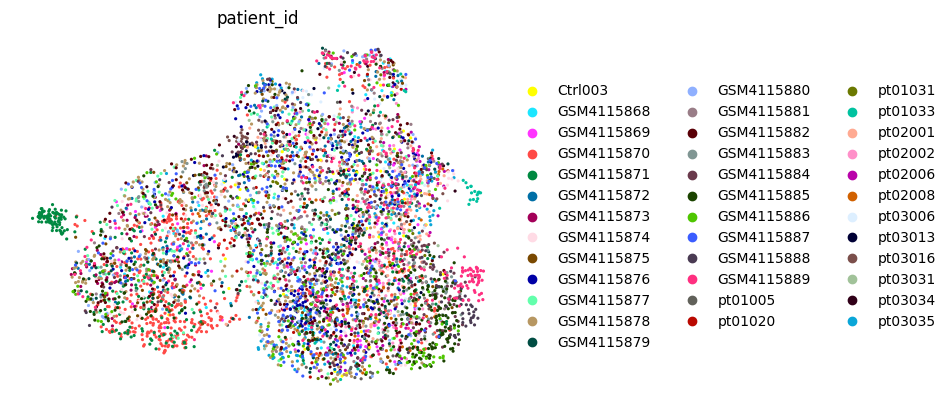

In [5]:
sc.pl.umap(adata, color=['patient_id'], frameon=False)

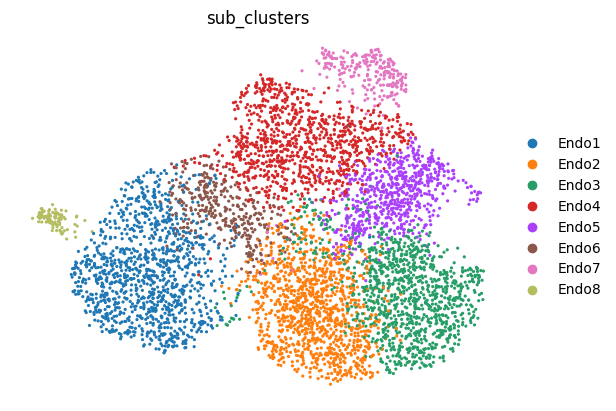

In [6]:
sc.pl.umap(adata, color=['sub_clusters'], frameon=False)

In [7]:
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters']

adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo1\b', 'EndoMT-2', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo2\b', 'VenEC', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo3\b', 'VenEC', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo4\b', 'ArtEC', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo5\b', 'VenEC', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo6\b', 'CapEC', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo7\b', 'LEC', regex=True)
adata.obs['sub_clusters_v2'] = adata.obs['sub_clusters_v2'].str.replace(r'\bEndo8\b', 'EndoMT-1', regex=True)

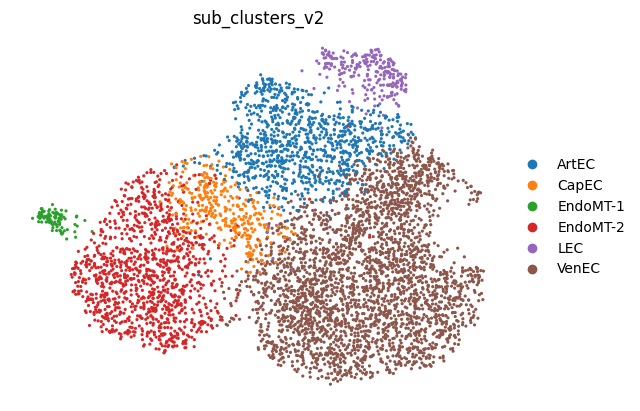

In [8]:
sc.pl.umap(adata, color=['sub_clusters_v2'], frameon=False)

In [9]:
# find marker genes
adata.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata, 'sub_clusters_v2', method='wilcoxon')
result = adata.uns['rank_genes_groups']

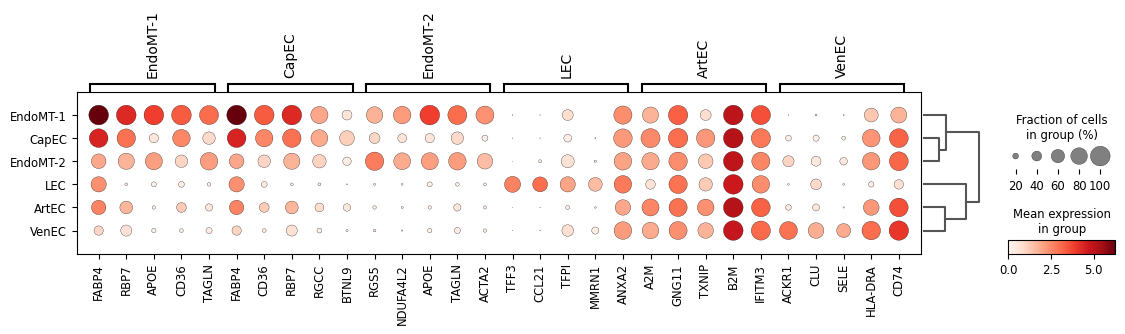

In [10]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

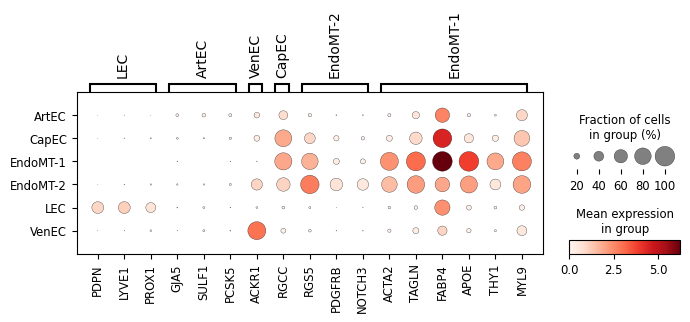

In [11]:
markers = {'LEC': ['PDPN', 'LYVE1', 'PROX1'],
           'ArtEC': ['GJA5', 'SULF1', 'PCSK5'],
           'VenEC': ['ACKR1'],
           'CapEC': ['RGCC'],
           'EndoMT-2': ['RGS5', 'PDGFRB', 'NOTCH3'],
           'EndoMT-1': ['ACTA2', 'TAGLN', 'FABP4', 'APOE', 'THY1', 'MYL9']}
sc.pl.dotplot(adata, markers, groupby='sub_clusters_v2')

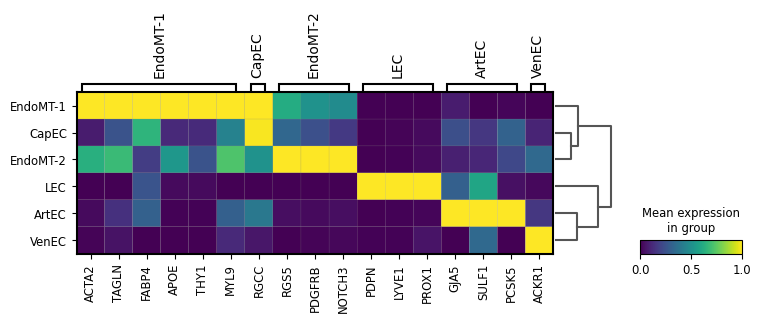

In [12]:
sc.pl.matrixplot(adata, markers, groupby='sub_clusters_v2', dendrogram=True, standard_scale='var')

In [13]:
# we can compute the cell-type composition between control and SSc
df_prop = pd.crosstab(adata.obs['patient_id'],adata.obs['sub_clusters_v2'], normalize='index').reset_index()
df_obs = adata.obs[['patient_id', 'condition']].drop_duplicates()
df_prop = pd.melt(df_prop, id_vars=['patient_id'], value_name='proportion')
df = df_prop.merge(df_obs)

df.to_csv(f'{out_dir}/endo_prop_in_patient.csv')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CapEC_Healthy vs. CapEC_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:2.933e-02 U_stat=2.090e+02
ArtEC_Healthy vs. ArtEC_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:1.893e-01 U_stat=1.030e+02
EndoMT-1_Healthy vs. EndoMT-1_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:1.824e-01 U_stat=1.625e+02
EndoMT-2_Healthy vs. EndoMT-2_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:2.313e-03 U_stat=2.350e+02
VenEC_Healthy vs. VenEC_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:1.784e-01 U_stat=1.020e+02
LEC_Healthy vs. LEC_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:2.008e-01 U_stat=1.820e+02


(<Axes: xlabel='sub_clusters_v2', ylabel='proportion'>,
  <statannotations.Annotation.Annotation at 0x7f7f4d493400>])

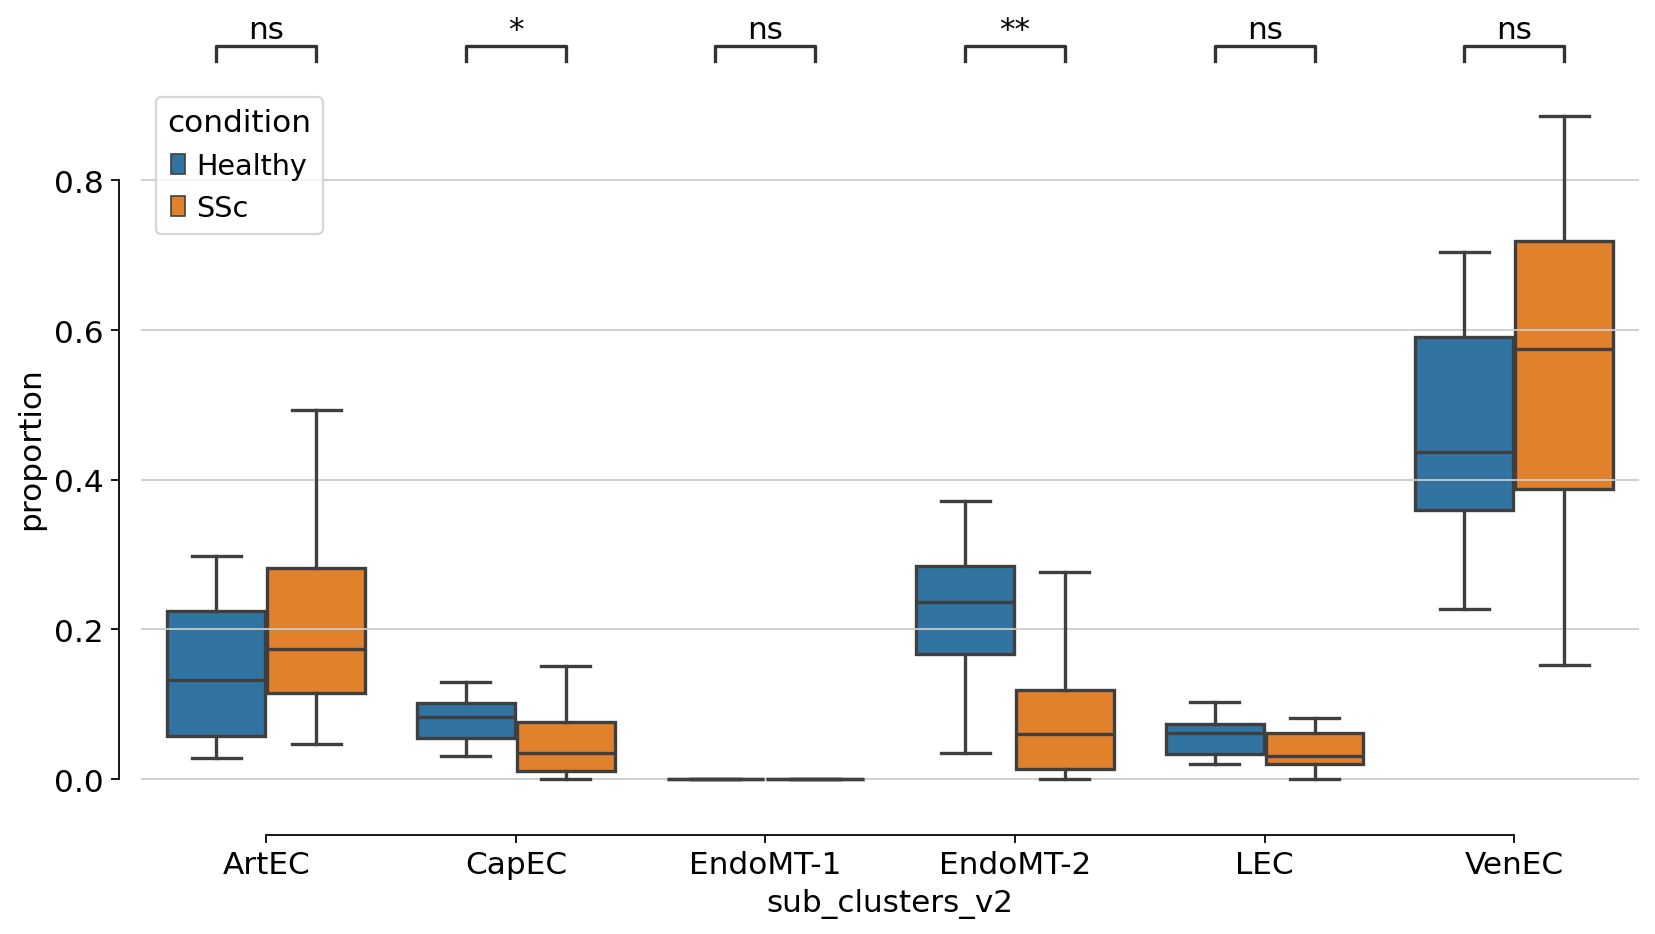

In [14]:
# visualize cell type proportion
sc.set_figure_params(figsize=(12, 6))
ax = sns.boxplot(data=df, 
                 x='sub_clusters_v2', y='proportion', 
                 hue="condition", 
                 showfliers = False)
sns.despine(offset=10, trim=True, ax=ax)

pairs=[(('EndoMT-2', "Healthy"), ('EndoMT-2', "SSc")),
      (('EndoMT-1', "Healthy"), ('EndoMT-1', "SSc")),
      (('VenEC', "Healthy"), ('VenEC', "SSc")),
      (('ArtEC', "Healthy"), ('ArtEC', "SSc")),
      (('CapEC', "Healthy"), ('CapEC', "SSc")),
      (('LEC', "Healthy"), ('LEC', "SSc"))]

annotator = Annotator(ax, pairs, data=df, x='sub_clusters_v2', y='proportion', hue='condition')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

In [15]:
adata.write_h5ad(f'{out_dir}/endothelial.h5ad')